# Possible multi TIC 52368076

In [5]:
%matplotlib inline
import matplotlib.pyplot as plt
from astropy.io import fits
import numpy as np
import astropy.units as u
from glob import glob

paths = glob('52368076/hlsp_*.fits')

files = [fits.getdata(path) for path in paths]

headers = [fits.getheader(path) for path in paths]

In [24]:
from scipy.stats import binned_statistic

class LightCurve(object):
    def __init__(self, times, fluxes, name=None): 
        nans = np.isnan(times) | np.isnan(fluxes) | (fluxes == 0)
        self.times = times[~nans]
        self.fluxes = fluxes[~nans]/np.median(fluxes[~nans])
        self.name = name
    
    def plot(self, *args, **kwargs): 
        plt.scatter(self.times, self.fluxes, *args, **kwargs)
        plt.title(self.name)
        
    def plot_phase_folded(self, params, *args, **kwargs): 
        phase = ((self.times - params['epoch']) % params['period']) / params['period']
        phase[phase >= 0.5] -= 1
        
        bs = binned_statistic(phase, self.fluxes, bins=200, statistic='median')
        bincenters = 0.5*(bs.bin_edges[1:] + bs.bin_edges[:-1])
        
        plt.scatter(phase, self.fluxes, *args, **kwargs)
        plt.scatter(bincenters, bs.statistic, marker='s', color='k', s=1)
        plt.title(self.name)
        plt.ylim(*np.percentile(self.fluxes, [0.1, 99.9]))

In [25]:
lcs = [LightCurve(f['TIME'], f['PDCSAP_FLUX'], header['OBJECT']) for f, header in zip(files, headers)]

In [26]:
lc = LightCurve(np.concatenate([lcs[0].times, lcs[1].times]), np.concatenate([lcs[0].fluxes, lcs[1].fluxes]), lcs[0].name)

In [27]:
paramsb = dict(period=4.653811, epoch=1327.432906)
paramsc = dict(period=9.150607, epoch=1334.45669)

/Users/bmmorris/anaconda/lib/python3.5/site-packages/scipy/stats/_binned_statistic.py:621: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  result = result[core]


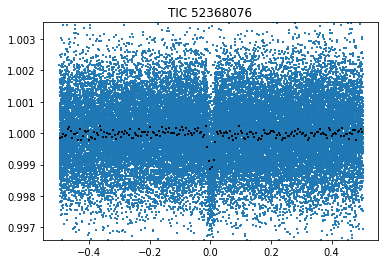

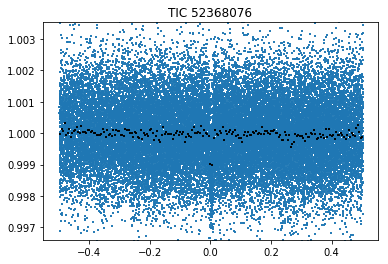

In [28]:
lc.plot_phase_folded(paramsb, marker=',', s=1)
plt.show()

lc.plot_phase_folded(paramsc, marker=',', s=1)